In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.interpolate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
iris = datasets.load_iris()

Converting numpy arrays into pandas dataframe to utilize its functionalities:

In [3]:
Iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [4]:
#features
X = Iris[Iris.columns[0:4]]
#classes
Y = Iris['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Let's see some box and whisker plots to get more insight on the data.

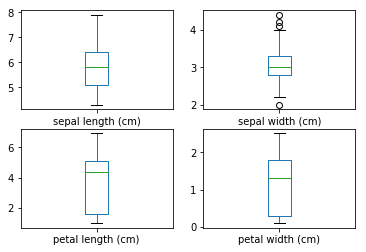

In [5]:
# box and whisker plots
X.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

Creating a colormap for different classes:

In [6]:
ColormapforY = Iris['target'].copy()
ColormapforY.replace(0.0,'r', inplace=True)
ColormapforY.replace(1.0,'b', inplace=True)
ColormapforY.replace(2.0,'g', inplace=True)

The functions for plotting data with respect to different features on x and y axis:

In [7]:
def plotfeatures(X, ColormapforY,layout=(3,2), decision_boundary=False, model=None,solid=False,Y=0):
    """
    Plots different classes with respect to different features on x- and y-axis. 
    
    Arguments:
    X -- Input data, matrix containing features in columns and examples in rows.
    ColormapforY -- Array containing assigned different colors to different classes by user.
    layout -- Dimensions of the subplots layout.
    decision_boundary -- Plot a decision boundary on the graphs or not.
    model -- Classifier model which is used for plotting the decision boundary.
    solid  -- Solid fill or no fill.
    Y -- Labelled classes for the input data (X).
    
    Returns:
    axes -- Axes containing plotted graphs of features(X_i,X_j) and classes(Y).
    """
    ## creating subplots with the layout = ().
    _, axes = plt.subplots(layout[0], layout[1],figsize=(10,10))
    
    ## for the ease of iterating over all the combinations of feautres, 
    ## unroll the axes into 1*dim_x(layout)*dim_y(layout).
    axes_unrolled=axes.reshape(1,layout[0]*layout[1])[0]
    count=0
    
    ## loop over all the combinations of the input features (columns) 
    for i1 in range(len(X.columns)):
        for i2 in range(i1+1,len(X.columns)):
            X.plot.scatter(X.columns[i1],X.columns[i2],c=ColormapforY,ax=axes_unrolled[count])
    
            ## function plotdecisionboundary is explained later, since, we don't plot the decision in next 
            ## cell, it's more convienient to explain it later.
            if decision_boundary:
                plotdecisionboundary(X[X.columns[i1]],X[X.columns[i2]],Y,axes_unrolled[count],model,solid)
            count=count+1
    return axes

def addlabels(X,ColormapforY,axes,labellist={}):
    
    """
    Adds user defined labels or numbered labels to the axes returned by 'plotfeatures'. 
    
    Arguments:
    X -- Input data, matrix containing features in columns and examples in rows.
    ColormapforY -- Array containing assigned different colors to different classes by user.
    axes -- Axes containing plotted graphs of features(X_i,X_j) and classes(Y).
    labellist -- Python dictionary containing "colors" and "class Names".
    Returns:
    None
    """
    ## Total number of different types of colors in ColormapforY.
    typesofcolors=set(ColormapforY)
    
    ## Searching for the first index of all different types of colors in the ColormapforY.
    Firstindexlist=[]            
    for types in typesofcolors:
        Firstindexlist.append(ColormapforY.loc[ColormapforY == types].index[0])
    
    ## Numbering the classes if labellist has less elements than the number of colors present in ColormapforY.
    if len(labellist) != len(typesofcolors):
        diff=set(typesofcolors)-set(labellist.keys())
        for colors in diff :
            labellist[colors] = 'Class '+str(len(labellist.keys())+1)
    
    ## Assigning the labels to colors.
    for index,fi in enumerate(Firstindexlist):
        axes[0][0].plot(X.iloc[fi][0],X.iloc[fi][1],c=ColormapforY[fi],marker='o',linestyle='None',label=labellist[ColormapforY[fi]])

    axes[0][0].legend(bbox_to_anchor=(2.2,0.98),loc=2,fontsize=25)
    plt.subplots_adjust(hspace = 0.4)

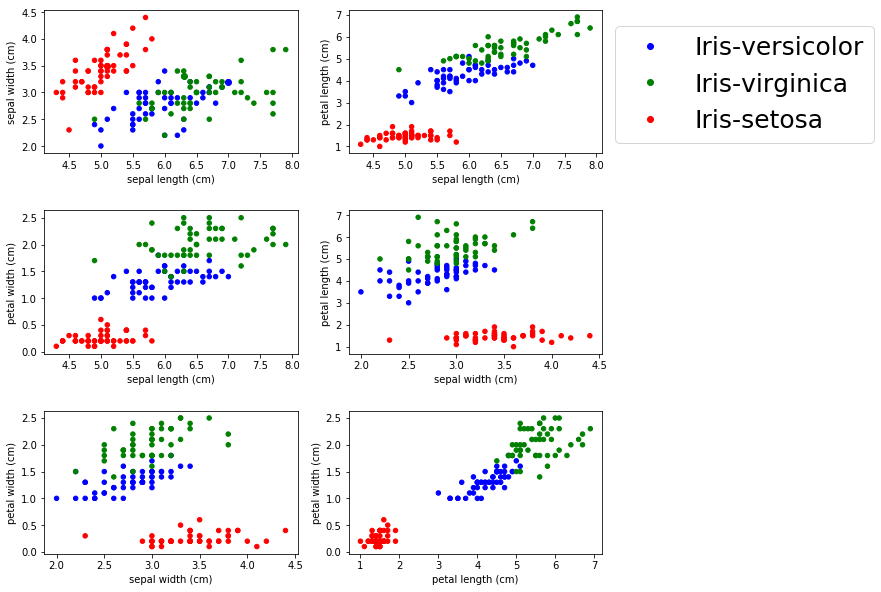

In [8]:
axes=plotfeatures(X,ColormapforY)
### Labelling the names of flowers as explained in iris the dataset documentation
addlabels(X,ColormapforY,axes,{'r':'Iris-setosa','b':'Iris-versicolor','g':'Iris-virginica'})

An instance of Logistic Regression from skilearn library. High value of C indicates that model is more likely to overfit.

In [9]:
LR = LogisticRegression(solver='newton-cg', C = 1e7,multi_class='multinomial')

A function for plotting the decision boundaries:

In [10]:
def plotdecisionboundary(X1,X2,Y,axes,model,solid):
    
    """
    Plots decision boundary depending on chosen classifier model. 
    
    Arguments:
    X1 -- Input data array, feature 1 to be plotted on x-axis.
    X2 -- Input data array, feature 2 to be plotted on y-axis.
    axes -- Axes containing plotted graphs of features(X1,X2) and classes(Y).
    model -- Classifier model which is used for plotting the decision boundary.
    solid  -- Solid fill or no fill.

    Returns:
    None
    """
    ## Calculation for the accuracy scores based on these two features and the chosen model.
    X1X2 =np.c_[X1,X2]
    model.fit(X1X2,Y)
    predictions = model.predict(X1X2)
    accuracy = accuracy_score(predictions,Y)
    
    ## Here, we'll use interpolate function of scipy package to create a decision boundary which
    ## doesn't have a solid fill.
    ## python documentation only provides an example with solid fill 
    ## https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    ## but it's better to see boundaries without the fill.
    
    ## meshgrid of (x,y) <-->(X1,X2){two features} to be inserted in the model for prediction of Y.  
    xi,yi = np.linspace(X1.min(),X1.max(),100), np.linspace(X2.min(),X2.max(),100)
    xi,yi = np.meshgrid(xi,yi)
    xi_unrolled=xi.reshape(1,xi.shape[0]*xi.shape[1])[0]
    yi_unrolled=yi.reshape(1,yi.shape[0]*yi.shape[1])[0]
    
    featurelist=np.c_[xi_unrolled,yi_unrolled]
    z = model.predict(featurelist)
    ## For solid fill
    if solid:
        z=z.reshape(xi.shape)
        axes.contourf(xi, yi, z, alpha=0.4)
    else:
        ## create a function based on the predicted values of the model.
        F_x=scipy.interpolate.SmoothBivariateSpline(xi_unrolled, yi_unrolled, z)
        
        numclasses=len(set(Y))
        for classes in range(numclasses):
            ## decision boundaries will exist where the interpolated function will have
            ## values closest to 0.5,1.5,2.5 etc.
            ## The threshold value of 0.01 is chosen based on the observations when plotted boundaries 
            ## looked reasonably good.
            tempcurve = np.abs(F_x.ev(xi_unrolled,yi_unrolled)-(0.5+classes))<0.01
            curvepoints_x = xi_unrolled[tempcurve == True]
            curvepoints_y = yi_unrolled[tempcurve == True]
            axes.plot(curvepoints_x,curvepoints_y,c='k')
            axes.set_title('Accuracy ={:.3f}'.format(accuracy))



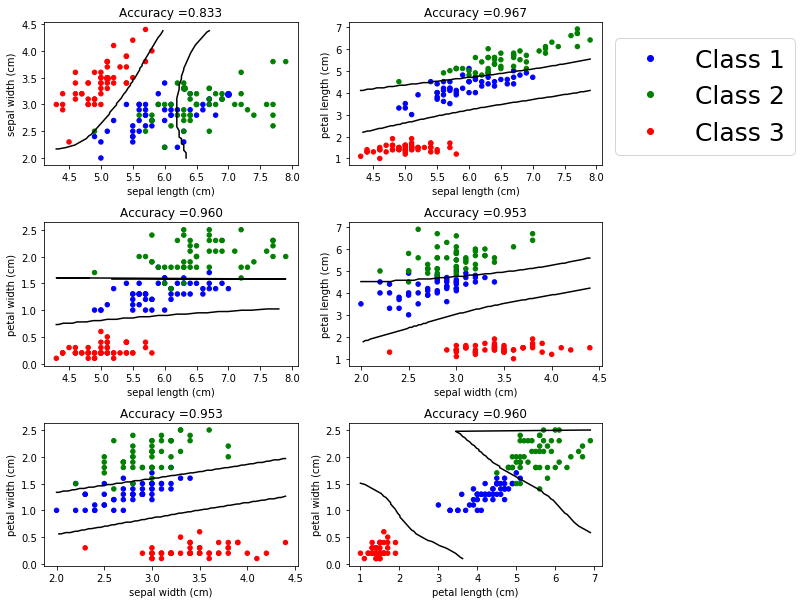

In [11]:
axes=plotfeatures(X,ColormapforY, decision_boundary=True, model=LR,Y=Y)
addlabels(X,ColormapforY,axes)

Interpretation:  
(i) Class 2 is completely separable from class 1 and 3.<br>
(ii) Features sepal length and sepal width are ambiougous for class 1 and 3(as indicative by the accuracy and mixing of blue and green dots).<br>
**Fitting the dataset with all the features together!**

In [12]:
LR.fit(X,Y)
accuracy = accuracy_score(LR.predict(X),Y)
print(accuracy)

0.9866666666666667


Accuracy is 99% in the case if all 3 classes are used. We can observe the increase in the accuracy to 100% if either class 1 or class 2 is removed (as class 3 is completely seperable).

In [13]:
X_red=X[Y != 2.0]
Y_red=Y[Y != 2.0]
LR.fit(X_red,Y_red)
accuracy = accuracy_score(LR.predict(X_red),Y_red)
print(accuracy)

1.0


In [14]:
X_red2=X[Y != 1.0]
Y_red2=Y[Y != 1.0]
LR.fit(X_red2,Y_red2)
accuracy = accuracy_score(LR.predict(X_red2),Y_red2)
print(accuracy)

1.0


In [15]:
X_red3=X[Y != 0]
Y_red3=Y[Y != 0]
LR.fit(X_red3,Y_red3)
accuracy = accuracy_score(LR.predict(X_red3),Y_red3)
print(accuracy)

0.98


We print out only classes 1 and 3 for the clean file to make it slightly more difficult.

In [16]:
import csv
d = np.c_[X[Y !=0], Y[Y != 0]-1]
header = list(X.columns) +["Class"]
with open('iris_clean.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile)
    wr.writerow((header))
    wr.writerows(d)
myfile.close()